# Cartopy (et une histoire de "Terre plate")

## Une histoire de "Terre plate"

Courant décembre 2024, 3 "platistes" américains ont été conviés à une expédition en Antarctique, baptisée ["The Final Experiment"](https://www.the-final-experiment.com/). L'objectif des accompagnateurs "globistes" était de montrer à ces "platistes" que le Soleil ne se couchait jamais en ce lieu autour du solstice de décembre. Antérieurement, ces 3 messieurs niaient en effet ce simple fait, voire l'existence même d'un pôle sud.

Pour garder une trace de cette expérience, des "timelapses" ont été réalisés ([1](https://www.youtube.com/watch?v=n9_cU3EDWG4) et [2](https://www.youtube.com/watch?v=xR3wPw2MoG0)). Dans [une vidéo](https://www.youtube.com/watch?v=dEc86p1vgLM), SciManDan évoque les réactions d'autres "platistes" américains au sujet de cette expédition, qu'ils considèrent factice malgré la présence sur les lieux de leurs 3 acolytes.

Vous pourriez dire "je m'en bats les reins de tout ce cirque" et je ne vous donnerais pas tort. Mais cette histoire me donne juste l'occasion de présenter un outil intéressant en Python qui s'appelle **cartopy**.

## Cartopy

Cartopy est un package Python conçu pour le traitement de données géospatiales afin de produire des cartes et d’autres analyses de données géospatiales :

https://scitools.org.uk/cartopy/docs/latest/#

On y retrouve notamment un grand nombre de projections cartographiques :

https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html

Une collection bien fournie d'exemples donne l'étendue des possibilités :

https://scitools.org.uk/cartopy/docs/latest/gallery/index.html

Essayons d'utiliser ce package pour localiser le point d'observation pour les "timelapses" précédemment évoqués, sur une carte [Day and Night World Map](https://www.timeanddate.com/worldclock/sunearth.html) disponible sur le site [timeanddate.com](https://www.timeanddate.com/).

Selon les informations données sous les vidéos, ce point est située à la longitude 82°48'21" ouest et la latitude 79°44'24" sud. La date d'observation est le 15 décembre 2024. La carte "Day and Night World Map" peut être récupérée à cette date, à 5h28 UTC, de sorte qu'il soit minuit (heure solaire) au point considéré. On vérifiera ainsi qu'il fait bien jour à minuit en ce point, sur différentes projections cartographiques.

On suivra ces étapes :
- Installation du package
```
pip install cartopy
```
- Données d'entrée
```
# 15 décembre 2024 à 5h28
date_choisie = '2024-12-16 05:28'
# longitude 82°48'21" ouest, latitude 79°44'24" sud
longitude = -(82+48/60+21/3600)
latitude = -(79+44/60+24/3600)
```
- Récupération d'une image sur le site timeanddate.com
```
On construit le lien menant directement à l'image (https://www.timeanddate.com/scripts/sunmap.php?iso=20241216T0528),
puis on lance une requête pour la télécharger. De façon aléatoire, le fichier image peut avoir le format JPG ou PNG,
mais ce n'est pas gênant pour la suite.
```
- Fichier image récupéré
```
20241216T0528.jpg ou 20241216T0528.png
```
- Visualisation de l'image
- Exploitation de l'image avec cartopy
- Ajout des lignes de côte
- Lieu du tournage (projection cylindrique équidistante)
- Lieu du tournage (projection orthographique centrée sur le pôle sud)
- Lieu du tournage (projection azimutale équidistante centrée sur le pôle sud)
- Projection orthographique centrée sur 80°W 45°S
- Projection azimutale équidistante centrée sur le pôle sud
- Cartes "jour et nuit" de cartopy
```
On peut se passer de l'image fournie par timeanddate
```

## Installation du package

In [1]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 28.4 MB/s eta 0:00:00


## Données d'entrée

In [2]:
# 15 décembre 2024 à 5h28
date_choisie = '2024-12-16 05:28'
# longitude 82°48'21" ouest, latitude 79°44'24" sud
longitude = -(82+48/60+21/3600)
latitude = -(79+44/60+24/3600)

## Récupération d'une image sur le site timeanddate.com

In [3]:
from datetime import datetime
import requests as rq

date_format = '%Y-%m-%d %H:%M'
dt = datetime.strptime(date_choisie, date_format)
iso = dt.strftime("%Y%m%dT%H%M")
link = "https://www.timeanddate.com/scripts/sunmap.php?iso="+iso
data = rq.get(link)
header_byte = data.content[0:3]
if header_byte.hex() == "ffd8ff":
    nomfich = iso+".jpg"
elif header_byte.hex() == "89504e":
    nomfich = iso+".png"
else:
    print("Format non reconnu")
print('Nom du fichier créé : '+nomfich)
f = open(nomfich, "wb")
f.write(data.content)
f.close()


Nom du fichier créé : 20241216T0528.png


## Fichier image récupéré

In [4]:
!ls -ls

total 224
220 -rw-r--r-- 1 root root 223584 Jan  3 12:23 20241216T0528.png
  4 drwxr-xr-x 1 root root   4096 Dec 19 14:20 sample_data


## Visualisation de l'image

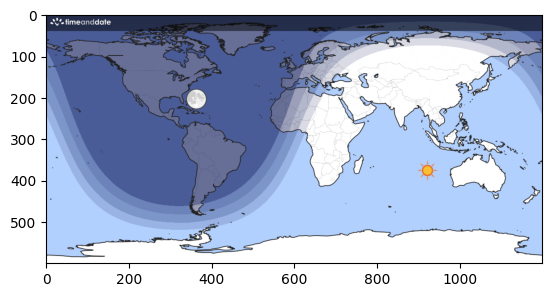

In [5]:
import matplotlib.pyplot as plt

im=plt.imread(nomfich)
plt.imshow(im)
plt.show()

## Exploitation de l'image avec cartopy

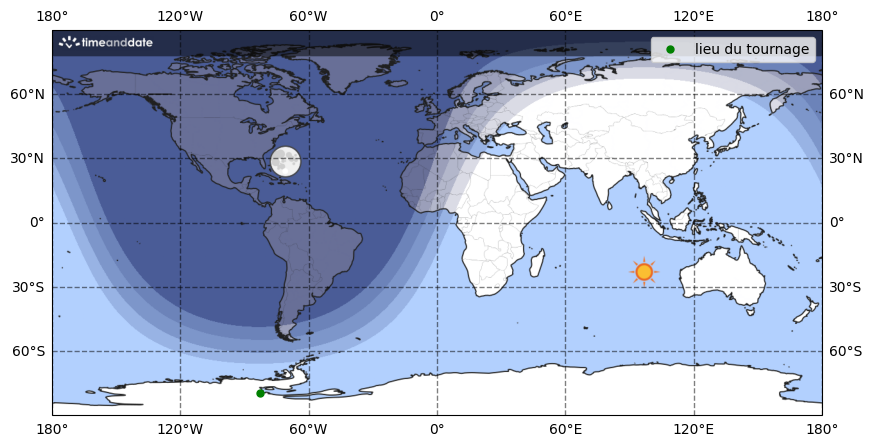

In [6]:
import cartopy.crs as ccrs

plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True)
ax.imshow(im,extent=ax.get_extent())
ax.plot(longitude, latitude, 'go', markersize=5, transform=ccrs.PlateCarree(),label='lieu du tournage')
ax.legend()

plt.show()

## Ajout des lignes de côte

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


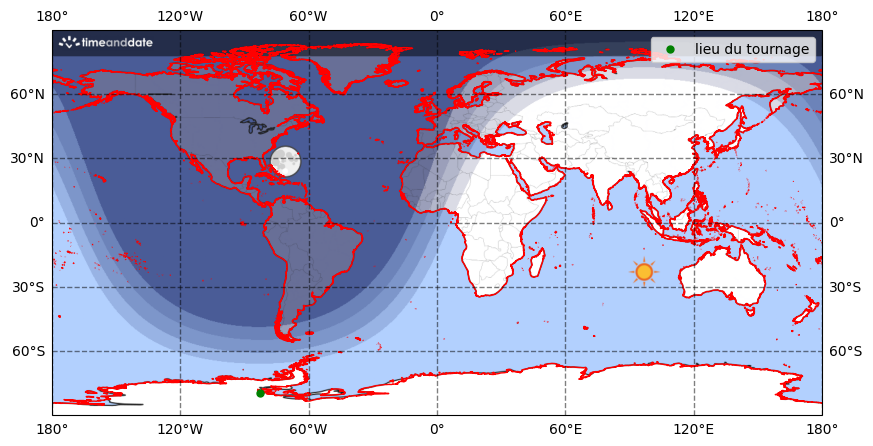

In [7]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m', color='r')
ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True)
ax.imshow(im,extent=ax.get_extent())
ax.plot(longitude, latitude, 'go', markersize=5, transform=ccrs.PlateCarree(),label='lieu du tournage')
ax.legend()

plt.show()

## Lieu du tournage (projection cylindrique équidistante)

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


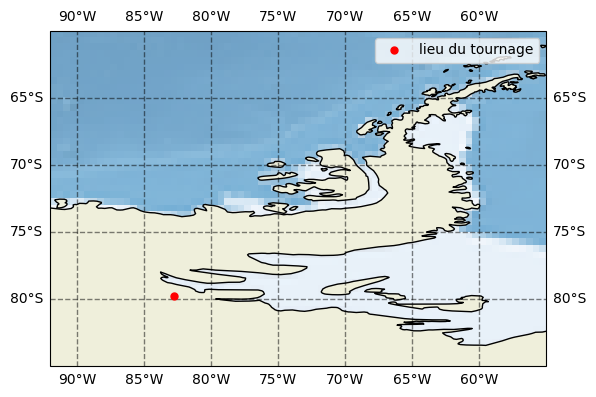

In [8]:
import cartopy.feature as cfeature

plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')
ax.set_extent([-92, -55, -85, -60])
ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True)
ax.plot(longitude, latitude, 'ro', markersize=5, transform=ccrs.PlateCarree(),label='lieu du tournage')
ax.legend()

plt.show()

## Lieu du tournage (projection orthographique centrée sur le pôle sud)

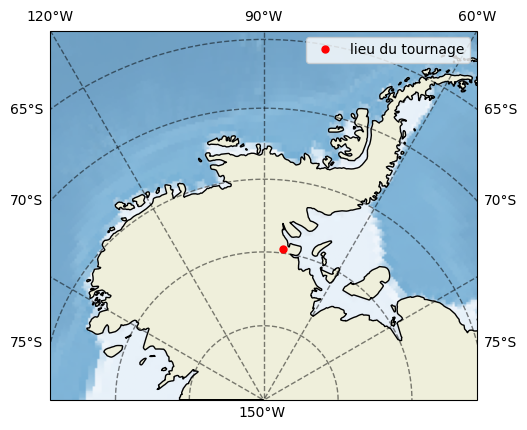

In [9]:
import cartopy.feature as cfeature

plt.figure()
ax = plt.axes(projection=ccrs.Orthographic(-90,-90))
ax.stock_img()
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')
ax.set_extent([-120, -60, -90, -60])
ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True)
ax.plot(longitude, latitude, 'ro', markersize=5, transform=ccrs.PlateCarree(), label='lieu du tournage')
ax.legend()

plt.show()

## Lieu du tournage (projection azimutale équidistante centrée sur le pôle sud)

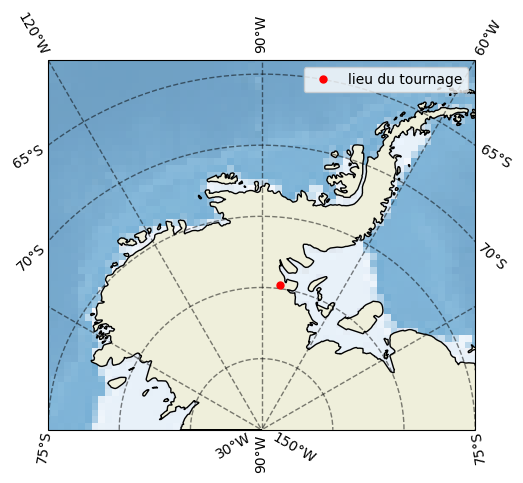

In [10]:
import cartopy.feature as cfeature

plt.figure()
ax = plt.axes(projection=ccrs.AzimuthalEquidistant(-90,-90))
ax.stock_img()
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')
ax.set_extent([-120, -60, -90, -60])
ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True)
ax.plot(longitude, latitude, 'ro', markersize=5, transform=ccrs.PlateCarree(), label='lieu du tournage')
ax.legend()

plt.show()

## Projection orthographique centrée sur 80°W 45°S

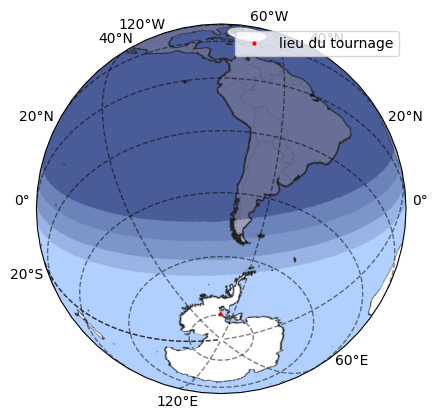

In [11]:
plt.figure()
ax = plt.axes(projection=ccrs.Orthographic(-80,-45))
ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True)
ax.imshow(im,transform=ccrs.PlateCarree())
ax.plot(longitude, latitude, 'ro', markersize=2, transform=ccrs.PlateCarree(), label='lieu du tournage')
ax.legend()

plt.show()

## Projection azimutale équidistante centrée sur le pôle sud

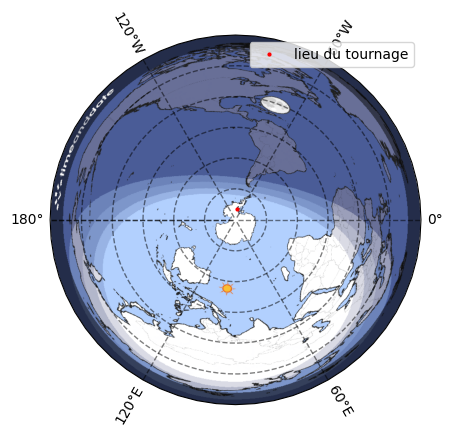

In [12]:
plt.figure()
ax = plt.axes(projection=ccrs.AzimuthalEquidistant(-90,-90))
ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True)
ax.imshow(im,transform=ccrs.PlateCarree())
ax.plot(longitude, latitude, 'ro', markersize=2, transform=ccrs.PlateCarree(), label='lieu du tournage')
ax.legend()

plt.show()

## Cartes "jour et nuit" de cartopy

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


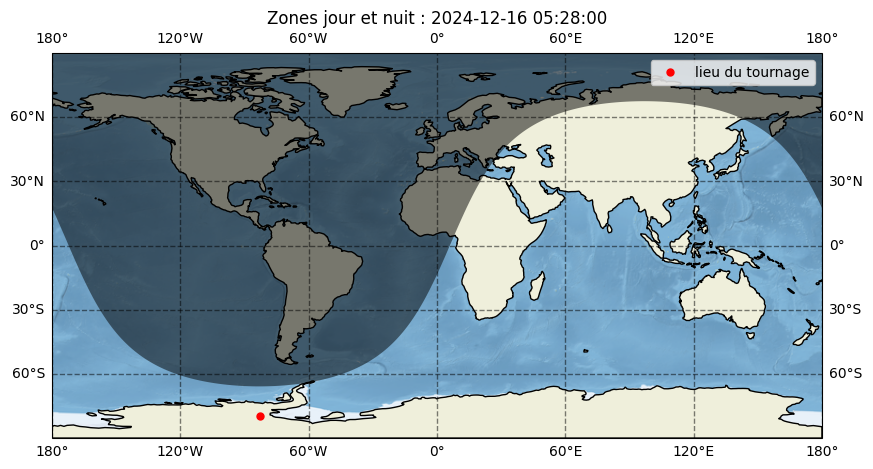

In [13]:
from cartopy.feature.nightshade import Nightshade

plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True)
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')
ax.add_feature(Nightshade(dt, zorder=2, alpha=0.5))
ax.plot(longitude, latitude, 'ro', markersize=5, transform=ccrs.PlateCarree(), label='lieu du tournage')
ax.legend()
ax.set_title(f'Zones jour et nuit : {dt}')
plt.show()

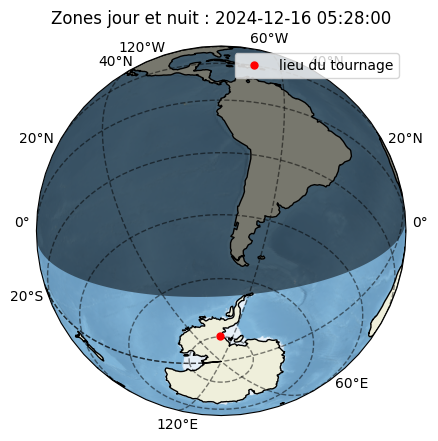

In [14]:
from cartopy.feature.nightshade import Nightshade

plt.figure()
ax = plt.axes(projection=ccrs.Orthographic(-80,-45))
ax.stock_img()
ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True)
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')
ax.add_feature(Nightshade(dt, zorder=2, alpha=0.5))
ax.plot(longitude, latitude, 'ro', markersize=5, transform=ccrs.PlateCarree(), label='lieu du tournage')
ax.legend()
ax.set_title(f'Zones jour et nuit : {dt}')
plt.show()